In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [6]:
def read_file(filename):
    data = pd.read_csv(filename)
    print(data.shape)
    data['label'] = data['label'].apply(lambda x: x.strip().lower())
    return data

In [7]:
datatrain = 'D:/Kuliah Online/Pemrosesan Teks Praktik/9th Meet/1st Session (Monday, April, 18th 2022)/Material/Data/mandalika21032022_edit1_cleanbobot401.csv'
datatest = 'D:/Kuliah Online/Pemrosesan Teks Praktik/9th Meet/1st Session (Monday, April, 18th 2022)/Material/Data/mandalika29032022_hapususer30_cleanLABELING.csv'

In [8]:
data_ho_train = read_file(datatrain)
data_ho_test = read_file(datatest)

(40, 2)
(24, 2)


In [9]:
target_encoder = LabelEncoder()
data_ho_train['targetTR'] = target_encoder.fit_transform(data_ho_train['label'])
data_ho_test['targetTS'] = target_encoder.transform(data_ho_test['label'])
data_ho_train.head(10)

,tweet_clean,label,targetTR
0,"['acara', 'motogp', 'mandalika', 'ubah', 'cek'...",positif,1
1,"['data', 'tarik', 'statistik', 'juara', 'dunia...",positif,1
2,"['kenal', 'baju', 'putih', 'senggol', 'dong']",positif,1
3,"['pawang', 'hujan', 'nusantara', 'fakta', 'sul...",positif,1
4,"['pawang', 'hujan', 'ada', 'marching', 'band']",positif,1
5,"['link', 'stream', 'motogp', 'lagi', 'rumah']",positif,1
6,"['link', 'tongsis', 'tripod', 'review', 'dong']",positif,1
7,"['budaya', 'melekat', 'membuat', 'gembira', 'l...",positif,1
8,"['gagal', 'wet', 'race', 'nihhh']",negatif,0
9,"['agak', 'ngeri', 'liat', 'riders', 'motogp', ...",positif,1


In [10]:
x_ho_train = data_ho_train.drop(['tweet_clean','label'], axis=1)
y_ho_train = data_ho_train['targetTR']
#x_ho_train.head()
x_ho_test = data_ho_test.drop(['tweet_clean','label'], axis=1)
y_ho_test = data_ho_test['targetTS']
#x_ho_train.head()

In [11]:
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_ho_train, y_ho_train)
model.score(x_ho_train, y_ho_train)
predicted= model.predict(x_ho_test)
	
accuracy_ho = accuracy_score(predicted, y_ho_test) * 100

y_preds = model.predict(x_ho_test)
print(confusion_matrix(y_ho_test,y_preds))
print(classification_report(y_ho_test,y_preds))
print('Akurasi Algoritma Decision Tree dengan persentase 70:30 = %s' % accuracy_ho)

[[ 9  0]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        15

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24

Akurasi Algoritma Decision Tree dengan persentase 70:30 = 100.0


d:\Kuliah Online\Coding & Machine Learning\Env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- targetTS
Feature names seen at fit time, yet now missing:
- targetTR

  warnings.warn(message, FutureWarning)
d:\Kuliah Online\Coding & Machine Learning\Env\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- targetTS
Feature names seen at fit time, yet now missing:
- targetTR

  warnings.warn(message, FutureWarning)


In [12]:
clf = DecisionTreeClassifier(max_depth = 10)

clf.fit(x_ho_train, y_ho_train)

DecisionTreeClassifier(max_depth=10)

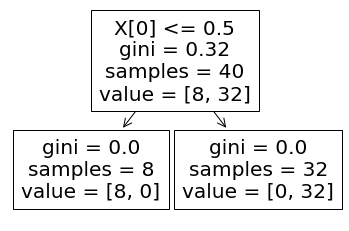

In [13]:
tree.plot_tree(clf);

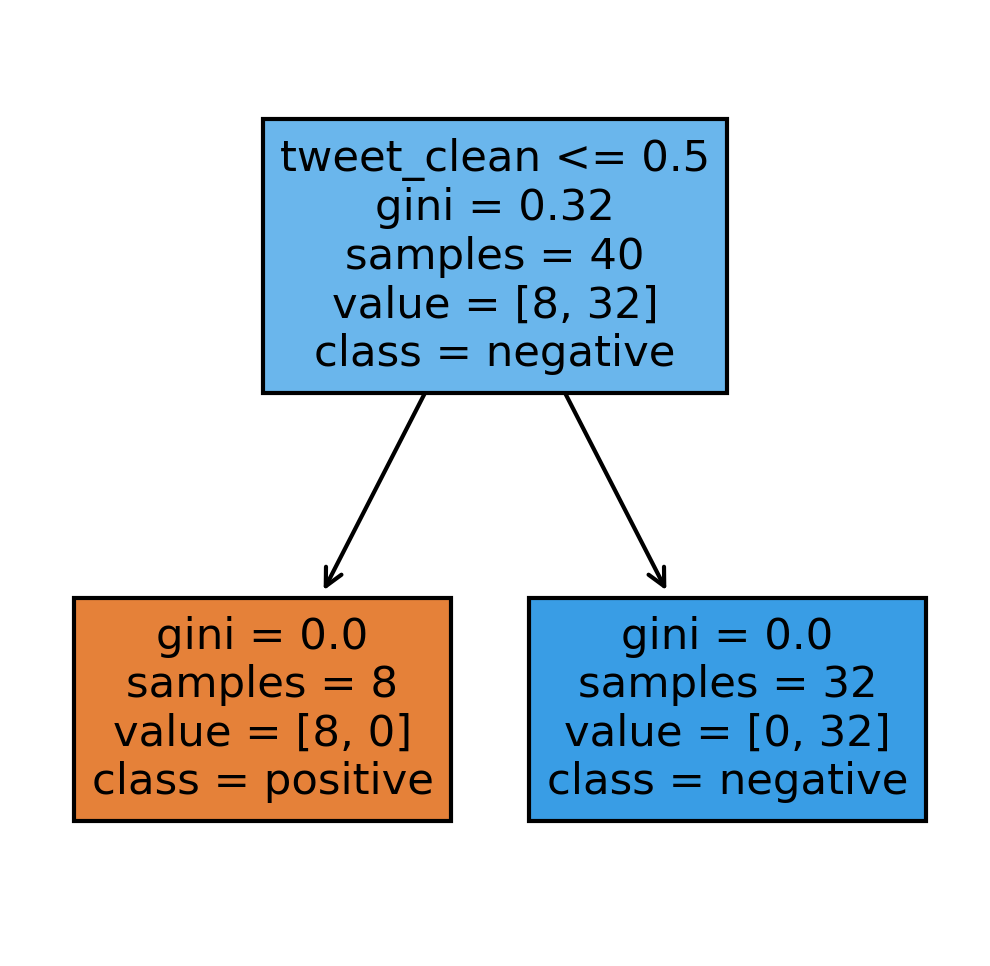

In [14]:
fn=['tweet_clean','label']
cn=['positive', 'negative']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
plot_tree(clf,
               feature_names = fn, 
               class_names=cn,
               filled = True);fig.savefig('imagename.png')